In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Coffe_sales (4).csv to Coffe_sales (4).csv


In [ ]:
# COFFEE SALES ANALYSIS (2024–2025)
# Author: Ada Leidman
# Student ID: 5893ZKUW

In [ ]:
# 1. Data Cleaning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Coffe_sales (4).csv')
df.head(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') #Convert 'Date' to datetime; coerce means the command will replace data that it cannot recognise to NaT (Not a Time)


In [ ]:
categorical_cols = ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name'] #Convert categorical columns to 'category' data type
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [ ]:
# Checking the outliers for 'money' using IQR method

Q1 = df['money'].quantile(0.25)
Q3 = df['money'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['money'] < lower_bound) | (df['money'] > upper_bound)]
num_outliers = len(outliers)
outlier_percentage = round(num_outliers / len(df) * 100, 2)


In [ ]:
print("Data Cleaning Summary")
print(f"Converted categorical columns: {categorical_cols}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {num_outliers}")
print(f"Outlier Percentage: {outlier_percentage}%")

Data Cleaning Summary
Converted categorical columns: ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']
Lower Bound: 16.16
Upper Bound: 47.52
Number of Outliers: 0
Outlier Percentage: 0.0%


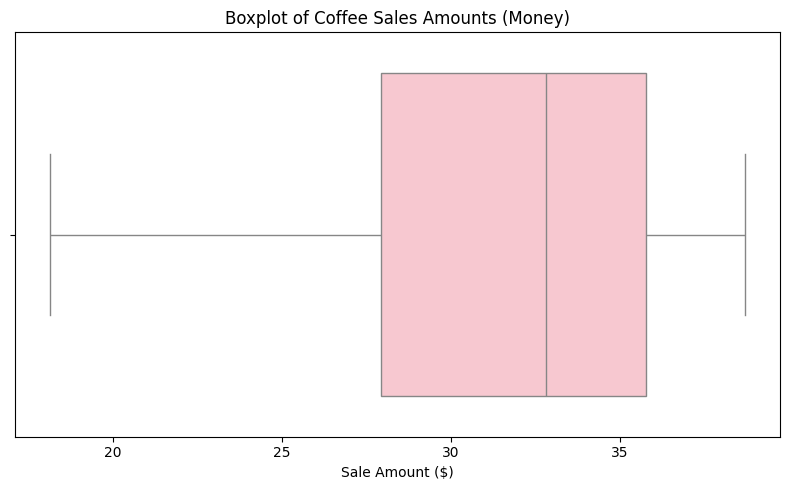

In [ ]:
# Visualize distribution of 'money'

plt.figure(figsize=(8,5))
sns.boxplot(x=df['money'], color='pink')
plt.title('Boxplot of Coffee Sales Amounts (Money)')
plt.xlabel('Sale Amount ($)')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("cleaned_coffee_sales.csv", index=False)

In [ ]:
# 2. Summary statistics

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('cleaned_coffee_sales.csv')


In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64']) # creating new DataFrame that contains only the numeric columns (numbers) from your main dataset

summary_numeric = numeric_df.describe() # summary statistics for numeric data only
print(summary_numeric)

       hour_of_day        money  Weekdaysort    Monthsort
count  3547.000000  3547.000000  3547.000000  3547.000000
mean     14.185791    31.645216     3.845785     6.453905
std       4.234010     4.877754     1.971501     3.500754
min       6.000000    18.120000     1.000000     1.000000
25%      10.000000    27.920000     2.000000     3.000000
50%      14.000000    32.820000     4.000000     7.000000
75%      18.000000    35.760000     6.000000    10.000000
max      22.000000    38.700000     7.000000    12.000000


In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

summary_table = numeric_df.describe().round(2) # we round the number until 2 numbers after the point
print(summary_table)

       hour_of_day    money  Weekdaysort  Monthsort
count      3547.00  3547.00      3547.00    3547.00
mean         14.19    31.65         3.85       6.45
std           4.23     4.88         1.97       3.50
min           6.00    18.12         1.00       1.00
25%          10.00    27.92         2.00       3.00
50%          14.00    32.82         4.00       7.00
75%          18.00    35.76         6.00      10.00
max          22.00    38.70         7.00      12.00


In [ ]:
correlation = numeric_df.corr() # correlations between numeric variables
print(correlation)


             hour_of_day     money  Weekdaysort  Monthsort
hour_of_day     1.000000  0.202748    -0.002614   0.008293
money           0.202748  1.000000    -0.017264  -0.050043
Weekdaysort    -0.002614 -0.017264     1.000000   0.044141
Monthsort       0.008293 -0.050043     0.044141   1.000000


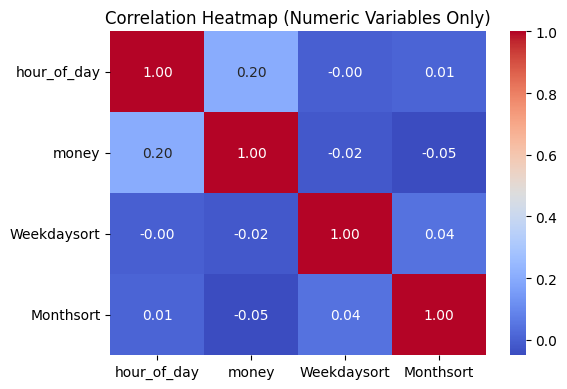

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f") # plotting the heatmap for correlation
plt.title("Correlation Heatmap (Numeric Variables Only)")
plt.tight_layout()
plt.show()

In [ ]:
# 3. Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_coffee_sales.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


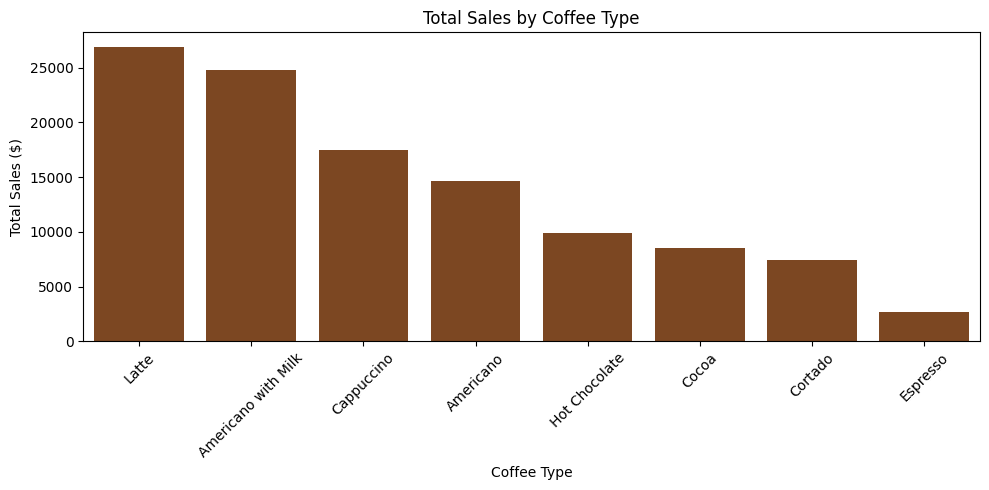

In [ ]:
# Bar Chart — Coffee type vs Total Money Earned

sales_by_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_coffee.index, y=sales_by_coffee.values, color='saddlebrown')
plt.title("Total Sales by Coffee Type")
plt.xlabel("Coffee Type")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1755688670.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['money'].sum()


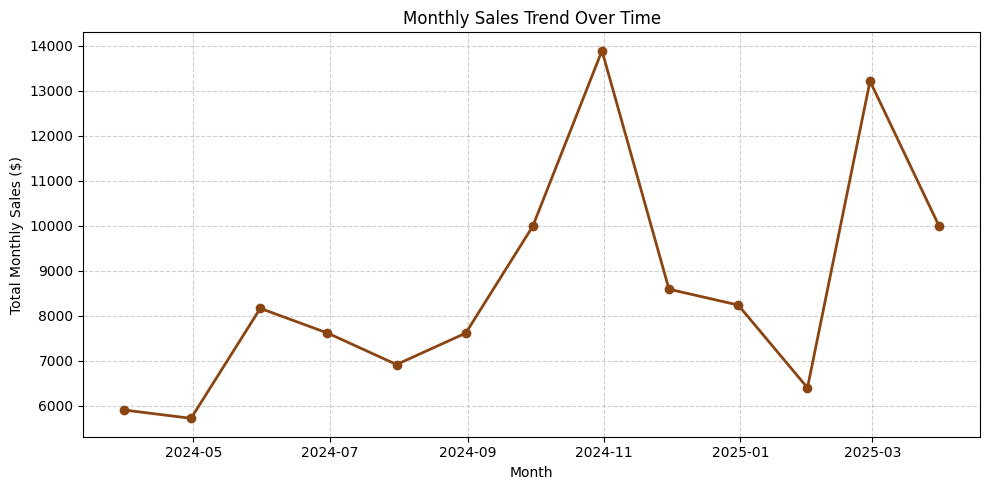

In [ ]:
# Line Chart — Sales Trend Over Time

monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['money'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='saddlebrown', linewidth=2)

plt.title("Monthly Sales Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Monthly Sales ($)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2875934280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time_of_Day', y='money', data=df, palette='Oranges')


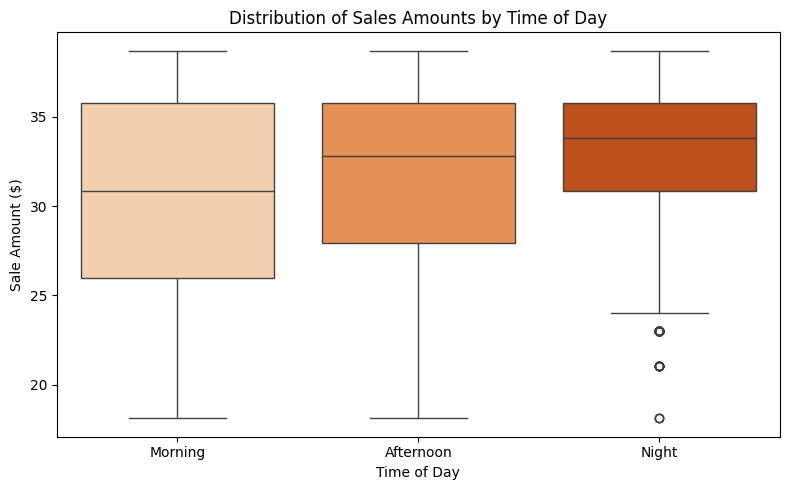

In [ ]:
# Box Plot — Sales Distribution by Coffee Type

plt.figure(figsize=(8, 5))
sns.boxplot(x='Time_of_Day', y='money', data=df, palette='Oranges')

plt.title("Distribution of Sales Amounts by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Sale Amount ($)")
plt.tight_layout()
plt.show()